# Gordon-Webb-Wolpert Drums

Here we use data from [Nils Berglund](https://www.youtube.com/watch?v=uQe5NJLok9w) to construct audio files to listen to his simulations of Gordon-Webb-Wolpert drums, or non-isometric boundaries on 2D wave-propagation that "sound" the same.

First: download the `.tar.gz` and convert into a Python-friendly format.

In [1]:
import requests
import tarfile
import pandas as pd
import numpy as np

# Download tar.gz
url = 'https://www.idpoisson.fr/berglund/data_isospectral_181021.tar.gz'
r = requests.get(url, allow_redirects=True)

fname = 'data.tar.gz'

# Save tar.gz
open(fname, 'wb').write(r.content)

# Unzip tar.gz
tar = tarfile.open(fname, "r:gz")
tar.extractall()
tar.close()

# Load unzipped files in pandas dataframes
left_df = np.genfromtxt('data/wave_left.txt')
right_df = np.genfromtxt('data/wave_right.txt')

# Sanity check
left_df[:5]

array([2.23561008e+16, 3.72552192e+16, 5.21469163e+16, 6.70282273e+16,
       8.18961909e+16])

Now we scale these series and save to a .wav

In [2]:
from scipy.io.wavfile import write

# Scale the array
def scale(df):
  return df/np.max(np.abs(df))

# Scale and format for audio
def save(df,fname):
  write(fname, 44100, np.int16(df*32767))

# Apply function
save(scale(left_df),"left.wav")
save(scale(right_df),"right.wav")

Now we can have a listen to `left.wav`. I recommend that you use headphones: the initial "pop" is quite exaggerated and you can't hear the nice rumbling after.

In [3]:
import IPython

IPython.display.Audio('left.wav')

And `right.wav`

In [4]:
IPython.display.Audio('right.wav')

Let's have a look at the raw waveform to see what is going on:

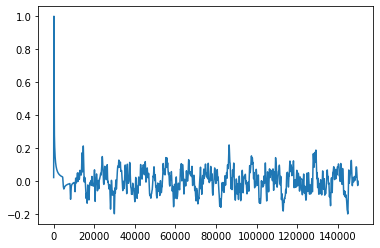

In [5]:
import matplotlib.pyplot as plt

plt.plot(scale(left_df))
plt.show()

Its now very clear where this pop comes from and the low rumble, lets finish by rendering a spectrogram and a periodogram:

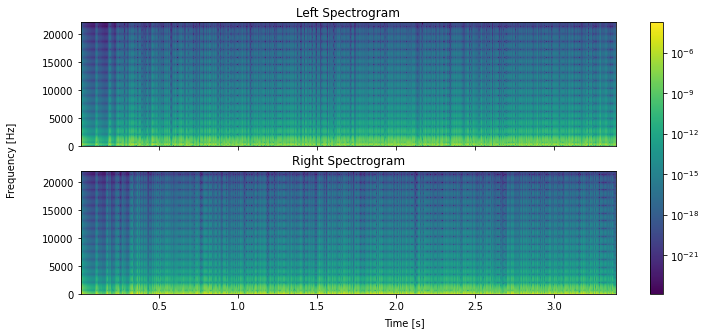

In [6]:
from scipy.signal import spectrogram
from matplotlib import colors

# Take spectrograms
fl,tl,S_left = spectrogram(scale(left_df),44100)
fr,tr,S_right = spectrogram(scale(right_df),44100)

# Matplotlib boilerplate
fig,axs = plt.subplots(2,1,figsize=(12,5),sharex=True)

im = axs[0].pcolormesh(tl,fl,S_left,norm=colors.LogNorm())
im = axs[1].pcolormesh(tr,fr,S_right,norm=colors.LogNorm())

# Make common axis labels
fig.text(0.5, 0.04, 'Time [s]', ha='center')
fig.text(0.04, 0.5, 'Frequency [Hz]', va='center', rotation='vertical')

# Set titles
axs[0].set_title("Left Spectrogram")
axs[1].set_title("Right Spectrogram")

# Add common colorbar
fig.colorbar(im,ax=axs.ravel().tolist())

plt.show()

This makes sense as the majority of the file is this rumbling noise. And now extracting the periodogram.

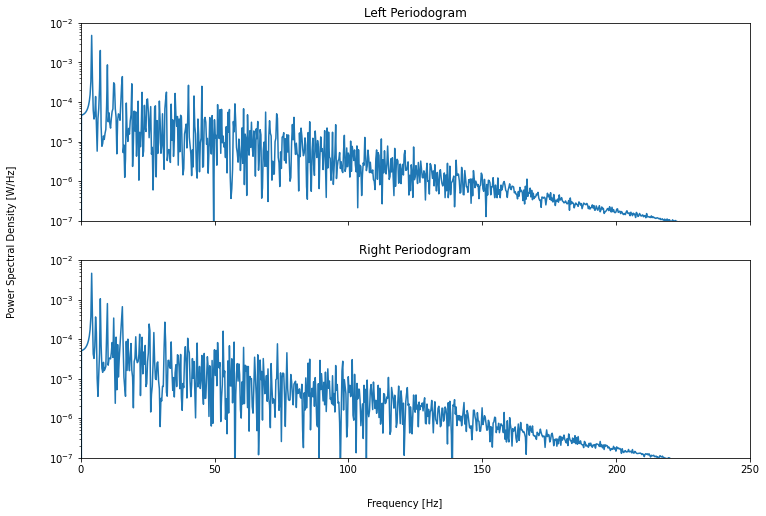

In [7]:
from scipy.signal import periodogram

fl,P_left = periodogram(scale(left_df),44100)
fr,P_right = periodogram(scale(right_df),44100)

# Matplotlib boilerplate
fig,axs = plt.subplots(2,1,figsize=(12,8),sharex=True)
axs[0].semilogy(fl,P_left)
axs[1].semilogy(fr,P_right)

# # Focus on a particular region of the periodogram
axs[0].set_ylim([1e-7,1e-2])
axs[1].set_ylim([1e-7,1e-2])
axs[0].set_xlim([0,250])
axs[1].set_xlim([0,250])

# Make common axis labels
fig.text(0.5, 0.04, 'Frequency [Hz]', ha='center')
fig.text(0.04, 0.5, 'Power Spectral Density [W/Hz]', va='center', rotation='vertical')

# Set titles
axs[0].set_title("Left Periodogram")
axs[1].set_title("Right Periodogram")

plt.show()

Eye-balling the two spectrograms and periodograms, there are definitely similarities which would indicate that the two drums have similar resonant frequencies - these images would become clearer with more data, however.